# Assignment Part 2: Neural Net Template

### Artificial Neural Net Class

### Main method

The following cell(s) should complete parts 2.1 to 2.5.

This ANN Class includes:  
2.1. Complete the implementation of the ANN class  
2.2. Complete the initialisation of the neural net (see comment)  
2.3. Complete the training implementation(see comment)  
2.4. Complete the testing implementation(see comment)  

In [25]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import math
np.random.seed(1)

In [26]:
class ANN:

    #==========================================#
    # The init method is called when an object #
    # is created. It can be used to initialize #
    # the attributes of the class.             #
    #==========================================#
    # 2.2. This is the part for complete the initialisation of the neural net:
    def __init__(self, no_inputs, hidden_layers=[3,4,5], max_iterations=20, learning_rate=0.05):
        self.no_inputs = no_inputs
        self.hidden_layers = hidden_layers
        self.max_iter = max_iterations
        self.learning_rate = learning_rate

        # layer_dims -- python array (list) containing the dimensions of each layer in our network
        # parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
        #                 Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
        #                 bl -- bias vector of shape (layer_dims[l], 1)
        output_layer = [1]
        self.layer_dims = [no_inputs] + hidden_layers + output_layer
        self.parameters  = {}
        L = len(self.layer_dims)            # number of layers in the network

        # TO-DO:
        layer_input_size = self.no_inputs
        for layer in range(1, L):
            no_nodes = self.layer_dims[layer]
            self.parameters['W' + str(layer)] = np.random.randn(no_nodes, layer_input_size) / np.sqrt(layer_input_size)
            self.parameters['b' + str(layer)] = np.zeros((no_nodes, 1))
            # Update layer_input_size to the number of nodes in the current layer, to prepare for initialization of the next layer
            layer_input_size = no_nodes

    #===================================#
    # Performs the activation function. #
    # Expects an array of values of     #
    # shape (1,N) where N is the number #
    # of nodes in the layer.            #
    #===================================#
    def activate(self, Z, activation): #define a forward propagation
        # Z -- numpy array of any shape   
        # A -- output of activation(z), same shape as Z
        # cache -- returns Z as well, useful during backpropagation
        cache = Z
        if activation == "sigmoid":
            A = 1 / (1 + np.exp(-Z))
        elif activation == "relu":
            A = np.maximum(0, Z)
        return A, cache

    def activate_backward(self, dA, cache, activation): #define a backward propagation
        # dA -- post-activation gradient, of any shape
        # dZ -- Gradient of the cost with respect to Z
        # cache -- 'Z' where we store for computing backward propagation efficiently
        Z = cache
        if activation == "sigmoid":
            s = 1/(1+np.exp(-Z))
            dZ = dA * s * (1-s)
        elif activation == "relu":
            dZ = np.array(dA, copy=True) # to convert dz to a correct object     
            # When z <= 0, set dz to 0.
            dZ[Z <= 0] = 0
        assert (dZ.shape == Z.shape)
        return dZ

    #=========================================#
    # Performs feed-forward prediction on     #
    # batch of inputs.                        #
    #=========================================#
    def do_predict(self, X, activation = 'relu'):
        m = X.shape[1]
        n = len(self.parameters) // 2 # number of layers in the neural network
        p = np.zeros((1,m))
        
        # Forward propagation
        probas, caches = self.forward_propagation(X, activation = activation)

        # convert probas to 0/1 predictions
        for i in range(0, probas.shape[1]):
            if probas[0,i] > 0.5:
                p[0,i] = 1
            else:
                p[0,i] = 0
        return p
    
    def predict(self, X, y, parameters):
        """
        This function is used to predict the results of a  L-layer neural network.
        
        Arguments:
        X -- data set of examples you would like to label
        parameters -- parameters of the trained model
        
        Returns:
        p -- predictions for the given dataset X
        """
    
        m = X.shape[1]
        n = len(parameters) // 2 # number of layers in the neural network
        p = np.zeros((1,m))
        
        # Forward propagation
        probas, caches = self.forward_propagation(X)

        
        # convert probas to 0/1 predictions
        for i in range(0, probas.shape[1]):
            if probas[0,i] > 0.5:
                p[0,i] = 1
            else:
                p[0,i] = 0
        
        #print results
        #print ("predictions: " + str(p))
        #print ("true labels: " + str(y))
        print("Accuracy: "  + str(np.sum((p == y)/m)))
            
        return p
    
    def linear_forward(self, A, W, b):
    #  Implement the linear part of a layer's forward propagation.
    # A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    # W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    # b -- bias vector, numpy array of shape (size of the current layer, 1)
        # print("Ashape:"+ str(A.shape))
        # print("Wshape:"+ str(W.shape))
        # print("bshape:"+ str(b.shape))
        Z = W @ A + b
        assert(Z.shape == (W.shape[0], A.shape[1]))
        cache = (A, W, b)
        return Z, cache
    
    def linear_activation_forward(self, A_prev, W, b, activation):
        # Implement the forward propagation for the LINEAR->ACTIVATION layer
        # A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
        # W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
        # b -- bias vector, numpy array of shape (size of the current layer, 1)
        # activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
        # A -- the output of the activation function, also called the post-activation value 
        # cache -- a python tuple containing "linear_cache" and "activation_cache";
        #          stored for computing the backward pass efficiently
        Z, linear_cache = self.linear_forward(A_prev, W, b)
        A, activation_cache = self.activate(Z, activation)

        assert (A.shape == (W.shape[0], A_prev.shape[1]))
        cache = (linear_cache, activation_cache)
        
        return A, cache

    def forward_propagation(self, X, activation = 'relu'):
        # Implement [LINEAR -> activation]*(L-1). Add "cache" to the "caches" list.
        # X -- data, numpy array of shape (input size, number of examples)
        # AL -- last post-activation value
        # caches -- list of caches containing:
        #             every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
        caches = []
        A = X
        L = len(self.parameters) // 2              # number of layers in the neural network  

        for l in range(1, L):
            A_prev = A 

            A, cache = self.linear_activation_forward(A_prev, self.parameters["W" + str(l)], self.parameters["b" + str(l)], activation)
            caches.append(cache)

        # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
        AL, cache = self.linear_activation_forward(A, self.parameters["W" + str(L)], self.parameters["b" + str(L)], "sigmoid")
        caches.append(cache)
        assert(AL.shape == (1,X.shape[1]))          
        return AL, caches
    
    #=========================================#
    # Performs back-forward prediction on     #
    # batch of inputs.                        #
    #=========================================#
    def linear_backward(self, dZ, cache):
    # Implement the linear portion of backward propagation for a single layer (layer l)
    # dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    # cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
    # dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    # dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    # db -- Gradient of the cost with respect to b (current layer l), same shape as b
        A_prev, W, b = cache
        m = A_prev.shape[1]

        dW = dZ @ A_prev.T / m
        db = np.mean(dZ, axis=1, keepdims=True)
        dA_prev = W.T @ dZ
        
        assert (dA_prev.shape == A_prev.shape)
        assert (dW.shape == W.shape)
        assert (db.shape == b.shape)
        
        return dA_prev, dW, db
    
    def linear_activation_backward(self, dA, cache, activation):
        # Implement the backward propagation for the LINEAR->ACTIVATION layer.
        # dA -- post-activation gradient for current layer l 
        # cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
        # activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
        # dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
        # dW -- Gradient of the cost with respect to W (current layer l), same shape as W
        # db -- Gradient of the cost with respect to b (current layer l), same shape as b

        linear_cache, activation_cache = cache
        dZ = self.activate_backward(dA, activation_cache, activation)
        dA_prev, dW, db = self.linear_backward(dZ, linear_cache)  
        return dA_prev, dW, db

    def backward_propagation(self, AL, Y, caches, activation = 'relu'):
        # Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
        # X -- input dataset, of shape (input size, number of examples)
        # Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
        #cache -- cache output from forward_propagation()
        # grads -- A dictionary with the gradients
        grads = {}
        L = len(caches) # the number of layers
        m = AL.shape[1]
        Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

        # Initializing the backpropagation
        dAL = -Y / AL + (1 - Y) / (1 - AL)
        
        # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
        current_cache = caches[L - 1]
        grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = self.linear_activation_backward(dAL, current_cache, "sigmoid")
        
        # Loop from l=L-2 to l=0
        for l in reversed(range(L-1)):
            # lth layer: (activation -> LINEAR) gradients.
            # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
            current_cache = caches[l]
            dA_prev_temp, dW_temp, db_temp = self.linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation)
            grads["dA" + str(l)] = dA_prev_temp
            grads["dW" + str(l + 1)] = dW_temp
            grads["db" + str(l + 1)] = db_temp

        return grads
    
    def update_parameters(self, grads):
        # Update parameters using gradient descent
        # parameters -- python dictionary containing your parameters 
        # grads -- python dictionary containing your gradients, output of backward_propagation
        # parameters -- python dictionary containing your updated parameters 
        #             parameters["W" + str(l)] = ... 
        #             parameters["b" + str(l)] = ...
        L = len(self.parameters) // 2 # number of layers in the neural network

        # Update rule for each parameter. Use a for loop.
        for l in range(L):
            self.parameters["W" + str(l+1)] -= self.learning_rate * grads["dW" + str(l+1)]
            self.parameters["b" + str(l+1)] -= self.learning_rate * grads["db" + str(l+1)]

        return self.parameters
    
    #===============================#
    # Trains the net using labelled #
    # training data.                #
    #===============================#
    #2.3. Complete the training implementation
    def do_train(self, training_data, labels, activation, mini_batch_size = 64):
        assert training_data.shape[1] == labels.shape[1]
        # TO-DO:
        costs = []                       # to keep track of the cost
        m = training_data.shape[1]                   # number of training examples

        #     # Loop (gradient descent)
        for i in range(self.max_iter):
            # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
            minibatches = self.random_mini_batches(training_data, labels, mini_batch_size)
            cost_total = 0
            
            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch

                # Forward propagation
                AL, caches = self.forward_propagation(minibatch_X, activation= activation)

                # Compute cost and add to the cost total
                cost_total += self.compute_cost(AL, minibatch_Y)

                # Backward propagation
                grads = self.backward_propagation(AL, minibatch_Y, caches, activation= activation)

                # Update parameters
                self.parameters = self.update_parameters(grads)
            cost_avg = cost_total / m

                    # Print the cost every 10 iter
            if i % 10 == 0:
                print ("Cost after iter %i: %f" %(i, cost_avg))
            costs.append(cost_avg)
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iter')
        plt.title("Learning rate =" + str(self.learning_rate))
        plt.show()
        
        return self.parameters
    
    def random_mini_batches(self, X, Y, mini_batch_size = 64):
        # Creates a list of random minibatches from (X, Y)
        # X -- input data, of shape (input size, number of examples)
        # Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
        # mini_batch_size -- size of the mini-batches, integer
        # mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
        
        m = X.shape[1]                  # number of training examples
        mini_batches = []
            
        # Step 1: Shuffle (X, Y)
        permutation = list(np.random.permutation(m))
        shuffled_X = X[:, permutation]
        shuffled_Y = Y[:, permutation].reshape((1,m))

        # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
        num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
        for k in range(0, num_complete_minibatches):
            mini_batch_X = shuffled_X[:, k * mini_batch_size : (k + 1) * mini_batch_size]
            mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k + 1) * mini_batch_size]
            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)
        
        # Handling the end case (last mini-batch < mini_batch_size)
        if m % mini_batch_size != 0:
            mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size :]
            mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size :]
            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)
        
        return mini_batches
    
    #=========================================#
    # Tests the prediction on each element of #
    # the testing data. Prints the precision, #
    # recall, and accuracy.                   #
    #=========================================#
    #2.4. Complete the testing implementation
    def test(self, testing_data, labels, activation='relu'):
        assert testing_data.shape[1] == labels.shape[1]
        
        prediction = self.do_predict(testing_data, activation=activation)

        true_positives = np.sum((prediction == 1) & (labels == 1))
        true_negatives = np.sum((prediction == 0) & (labels == 0))
        false_positives = np.sum((prediction == 1) & (labels == 0))
        false_negatives = np.sum((prediction == 0) & (labels == 1))
        
        # below defination from teaching slides
        accuracy = (true_positives + true_negatives) / labels.shape[1] if len(labels) > 0 else 0
        precision = true_positives / (true_positives + false_positives) if true_positives + false_positives > 0 else 0
        recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives > 0 else 0
    
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
    
    def compute_cost(self, AL, Y):# Implement the cost function.
        # AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
        # Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)
        # cost -- cross-entropy cost
        m = Y.shape[1]

        # Compute loss from aL and y.
        cost = -np.mean(Y * np.log(AL+ 1e-8) + (1 - Y) * np.log(1 - AL+ 1e-8))
        
        cost = np.squeeze(cost)      # (e.g. this turns [[17]] into 17).
        assert(cost.shape == ())
        
        return cost

In [27]:

# TO-DO load training data
# TO-DO load testing data
train_df = pd.read_csv('overhead_mnist_train.csv')
test_df = pd.read_csv('overhead_mnist_test.csv')
type_df = pd.read_csv('overhead_mnist_classes.csv')

X_train_pre = train_df.iloc[:, 1:].values / 255  
y_train_pre = train_df.iloc[:, 0].values  
X_test_pre = test_df.iloc[:, 1:].values /255  
y_test_pre = test_df.iloc[:, 0].values  

def get_Xy(X_pre, y_pre, dataset_type):
    label = type_df[type_df['class'] == dataset_type]['label'].iloc[0]
    X = X_pre.T
    y = (y_pre == label).astype(int).reshape(1, -1)  # Change all types that need to be predicted to 1, and the others to 0, and become a two-dimensional array
    return  X, y

X_train, y_train = get_Xy(X_train_pre, y_train_pre, 'ship')
X_test, y_test = get_Xy(X_test_pre, y_test_pre, 'ship')

In [28]:
X_train_pre.T.shape
y_train_pre.shape

(68151,)

Cost after iter 0: 0.005305
Cost after iter 10: 0.003382


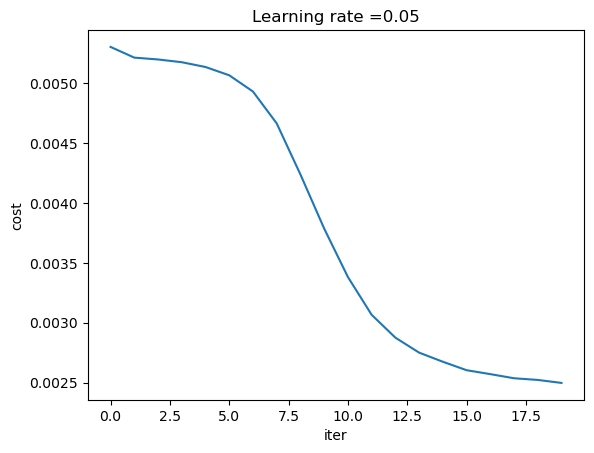

In [29]:
# TO-DO create a net
net_sigmoid = ANN(no_inputs = 28*28, max_iterations= 20)

# TO-DO call train
# Test your implementation on the full training and testing sets
parameters = net_sigmoid.do_train(X_train, y_train, activation = 'sigmoid')

In [30]:
# TO-DO call test
net_sigmoid.test(X_test, y_test, activation = 'sigmoid')

Accuracy: 0.9489
Precision: 0.8523
Recall: 0.6171


# Perform analysis

## Binary Comparasion
### Below scores are based on iter 20, lr 0.1:  

Q1: How much better are the results for object recognition, compared to the single-layer perceptron?  
The single-layer perceptron get the result of Accuracy 0.829~0.926, Pression 0.32~0.7, Recall around 0.54 based on different combinations. With 'batch' training the A/P are both low.  
The ANN with sigmoid activation has Accuracy in 0.952, Precision in 0.888 and Recall in 0.616. If we compare with the highest score from single perceptron, the increase is: Accuracy 2.8%, Precision 26.8%, Recall 14%.  


Q2: How did you modify the initial weights, learning rate, and iterations to achieve this?    
I do tried different combination for the weights, learning rate and iterations for both single-layter perceptron and ANN. For iteration above 200, learning rate = 0.001, the performance for both become unstable. Thuse I decide to use the initial parameter to do the binary comparison.  


Q3: How much faster/slower is the training time, compared to the single-layer perceptron?  
The training time for ANN is 13.3s and for single-layer perceptrons average is around 7.5s. Thus it's 77% slower.

Q4: How much quicker/slower does the learning converge, compared to the single-layer perceptron?  
The learning curve for ANN converge at iter 6 and become flatten after iter 13. But for sigle-layer iteration are keep improving after iter 30.

### 2.5. Implement the rectifier activation function

Cost after iter 0: 0.005370
Cost after iter 10: 0.002476


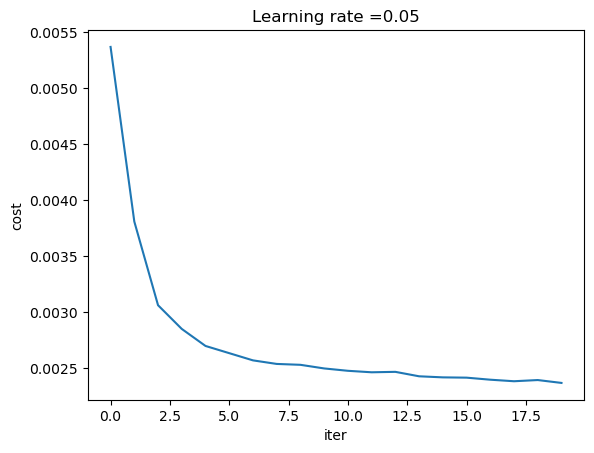

In [31]:
net_relu = ANN(no_inputs = 28*28, max_iterations= 20)
parameters = net_relu.do_train(X_train, y_train, activation = 'relu')

In [32]:
net_relu.test(X_test, y_test, activation = 'relu')

Accuracy: 0.9526
Precision: 0.9116
Recall: 0.6036


## Multi-class NN comparison: sigmoid / ReLU
### Below socres are based on iter=20, learning rate=0.01.

Q1: How much better are the results for object recognition, compared to the sigmoid activation function?  
The score for Sigmoid is Accuracy: 0.949, Precision: 0.8523, Recall: 0.6171.  
The score for ReLU is Accuracy: 0.9526, Precision: 0.9116, Recall:0.6039.  
ReLU is slightly better in A&P, but lower in Recall. ReLU vs Sigmoid - Accuracy: 0.38%, Precision: 6.96%, Recall: -2.14%.  

Q2: How much quicker/slower does the learning converge, compared to the sigmoid activation function?  
Sigmoid cost 12.9s, and ReLu cost 12.7s.
Sigmoid converge at 12 and flatten at arond 17 iteration.
ReLU converge at 2 and flatten at 6 iteration. Thus ReLU is much quicker in converage and flatten in learning iteration.  

Q3: How did you modify the initial weights, learning rate, and iterations to achieve this?  
The initial parameters are iter=20, lr=0.1, both activation function can converge and flatten before iter 20. With the lower lr, the learning curve converage at lowver iteration. For sigmoid fuction, this dataset getting 0 precision and recallt score at lr=0.01, thus, I've set the pameters as max iter=20, lr=0.05 to ensure they all getting result.